In [1]:
import part1_simstudy as p1
%matplotlib inline

# Discrete Event Simulator (DES) - Part 1

### Task 1.6.1: Confidence

*In the last section you have run your simulation and received a result. How could you establish statistical confidence in this case?*

With a single execution of the simulation it is not possible to establish statistical confidence. To achieve any degree of confidence the simulation must be executed multiple times. The Standard Deviation of the results can be used to assess the confidence intervals. Alternatively, the analytical solution of the problem can be used to validate the result (to some extent).

*Explain why it makes sense to use a heap as your data structure for the event chain.*

Using a heap ensures that the collection of events remains always ordered

### Task 1.6.3: Update Event Chain

*Explain why it makes sense to update the event chain during simulation instead of inserting all events at the beginning of simulation. Consider both types of events, Customer Arrivals and Service Completions*

While the Customer Arrivals appear at a fixed interval, the Service Completions are pseudorandom. This means that we would need to keep state information and therefore consume additional resources in comparison to inserting events during runtime.

### Task 1.7.1: Queue Length Determination I

*Find out which queue length is required such that after 100 s less than 10 packets are lost in at least 80% of 1000 simulation runs. Describe your idea how to design the simulation runs to achieve this goal. Think about cases, when you are close to fulfilling or not fulfilling the requirements and how you could assure a correct result in these cases.*

A rudimentary way to find this parameter would be the following. For queue length i, with 4 <= i <=10, run 1000 simulations. After each simulation check if the number of dropped packets is less than 10. If it's less, increment a counter. After the 1000 runs, if the counter (in percentage) is greater or equal than 80%, then the current i is the searched parameter. Otherwise, we reset the counter, increase the queue length, and execute again the 1000 simulations. Loop this procedure until a value is found (or not). If not, we might need to adjust the search range.

In [2]:
print(f'The required queue length is {p1.task_1_7_1()}')

The required queue length is 7


### Task 1.7.2: Queue Length Determination II

*Does the queue size depend on the simulation time? What happens if you simulate for 1000 s and want to have less than 100 dropped packets in 80% of the cases? Describe your observations!*

In [3]:
print(f'The required queue length is {p1.task_1_7_2()}')

The required queue length is 5


Yes, the required queue size depends on the simulation time. The longer the simulation time, the more we approximate to the real values (Weak Law of Large Numbers).
If we simulate 1000s the required queue length is 5 (see above cell).

### Task 1.7.3: Comparison of Results

*Compare the results of task 1.7.1 and task 1.7.2. Does the system behave differently or not? Explain your observations! Hint: Think about the distribution of the blocking probability per run. Possible solution: Plotting cumulative distribution functions of the blocking probabilities might be helpful.*

5


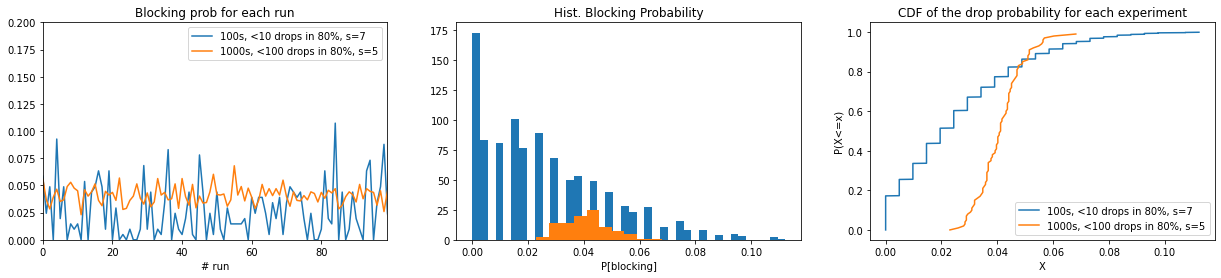

In [5]:
p1.task_1_7_3()

Yes, the system behaves differently. We can see by looking at both the variation of the drop probability and the CDFs, that the variability of the experiment is reduced when simulating longer. This can also be sen by looking at the histogram range. In other words, in the first graph, the y-range is smaller for longer times (orange) than for shorter (blue) and in the CDFs the x-range is also narrower. Hence, we gain precision when simulating longer.